In [157]:
# Make relevant plots of:
#  - Policies (as histogram)
#  - Policies (as bar chart)
#  - Diff in dose vs observed mortality for diff policies

In [356]:
%matplotlib inline
import pandas as pd
import numpy as np
try:
    import cPickle as pickle
except ImportError:
    import _pickle as pickle
import matplotlib.pyplot as plt

In [357]:
df_orig = pd.read_csv('../data/MKdataset07Feb17.csv')
df_orig.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,mechvent,SOFA,SIRS,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev
0,1,3,7245052800,0,17639.826435,0.0,0,0,1,77.5,...,0,9,4,0.0,0.0,3500.0,2100.0,230.0,230.0,3270.0
1,2,3,7245067200,0,17639.826435,0.0,0,0,1,77.5,...,0,8,3,0.0,0.0,5499.0,1999.0,697.0,467.0,4802.0
2,3,3,7245081600,0,17639.826435,0.0,0,0,1,77.5,...,0,7,3,0.0,0.0,5604.0,105.0,2302.0,1605.0,3302.0
3,4,3,7245096000,0,17639.826435,0.0,0,0,1,77.5,...,0,6,3,0.0,0.0,5664.0,60.0,2922.0,620.0,2742.0
4,5,3,7245110400,0,17639.826435,0.0,0,0,1,77.5,...,0,5,3,0.0,0.0,5724.0,60.0,3352.0,430.0,2372.0


In [358]:
df_train = pd.read_csv('../data/rl_train_set_scaled.csv')
df_test = pd.read_csv('../data/rl_test_set_scaled.csv')
df_train.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev,vaso_input,iv_input,reward
0,0.000000,3,7245052800,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.797351,0.939195,0.589916,0.750908,0.554500,0.0,4.0,0
1,0.222560,3,7245067200,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.831780,0.934543,0.674384,0.819589,0.580033,0.0,4.0,0
2,0.356608,3,7245081600,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.833222,0.656575,0.765423,0.939329,0.555033,0.0,2.0,0
3,0.452837,3,7245096000,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.834033,0.603831,0.783597,0.847073,0.545700,0.0,2.0,0
4,0.527957,3,7245110400,0.0,0.412568,0.0,0.0,0,1,0.262712,...,0.0,0.0,0.834836,0.603831,0.794059,0.811583,0.539533,0.0,2.0,0


In [359]:
df_train_orig = df_orig[df_orig['icustayid'].isin(df_train['icustayid'].unique())]
df_test_orig = df_orig[df_orig['icustayid'].isin(df_test['icustayid'].unique())]
df_train_orig.head()

,bloc,icustayid,charttime,gender,age,elixhauser,re_admission,died_in_hosp,mortality_90d,Weight_kg,...,mechvent,SOFA,SIRS,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev
0,1,3,7245052800,0,17639.826435,0.0,0,0,1,77.5,...,0,9,4,0.0,0.0,3500.0,2100.0,230.0,230.0,3270.0
1,2,3,7245067200,0,17639.826435,0.0,0,0,1,77.5,...,0,8,3,0.0,0.0,5499.0,1999.0,697.0,467.0,4802.0
2,3,3,7245081600,0,17639.826435,0.0,0,0,1,77.5,...,0,7,3,0.0,0.0,5604.0,105.0,2302.0,1605.0,3302.0
3,4,3,7245096000,0,17639.826435,0.0,0,0,1,77.5,...,0,6,3,0.0,0.0,5664.0,60.0,2922.0,620.0,2742.0
4,5,3,7245110400,0,17639.826435,0.0,0,0,1,77.5,...,0,5,3,0.0,0.0,5724.0,60.0,3352.0,430.0,2372.0


In [360]:
#  next two cells - check that the extracted trajectories in test dataset are ok
assert len(df_test) == len(df_test_orig)
assert not (False in np.array(df_test['icustayid']) == np.array(df_test_orig['icustayid']))

In [361]:
#  Extract out the interventions from the training dataset and find the medians for each dosage - these
#  represent the continuous analog of the chosen actions
interventions = df_train_orig[["max_dose_vaso", "input_4hourly_tev"]]
interventions.head()

,max_dose_vaso,input_4hourly_tev
0,0.0,2100.0
1,0.0,1999.0
2,0.0,105.0
3,0.0,60.0
4,0.0,60.0


In [278]:
columns = ['median_dose_vaso', 'max_dose_vaso', 'input_total_tev', 'input_4hourly_tev', 'output_total', 'output_4hourly', 'cumulated_balance_tev']
fluids_df = df_train_orig[columns]
fluids_df.describe()

,median_dose_vaso,max_dose_vaso,input_total_tev,input_4hourly_tev,output_total,output_4hourly,cumulated_balance_tev
count,128678.000000,128678.000000,128678.000000,128678.000000,128678.000000,128678.000000,128678.000000
mean,0.058131,0.071033,6974.199969,324.178227,4178.829230,310.664400,2793.290309
std,0.237483,0.289759,9106.835549,598.382280,6761.818247,351.587314,8292.519208
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-48455.025000
25%,0.000000,0.000000,1770.000000,10.000000,700.000000,79.000000,-428.799117
50%,0.000000,0.000000,4647.062500,80.000000,2110.000000,220.000000,1638.829458
75%,0.000000,0.000000,8961.664833,400.000000,4810.000000,425.000000,5191.739212
max,5.470000,8.716000,315802.821083,17058.576800,153855.000000,7500.000000,313325.996083


In [362]:
adjusted_vaso = interventions["max_dose_vaso"][interventions["max_dose_vaso"] > 0]
adjusted_iv = interventions["input_4hourly_tev"][interventions["input_4hourly_tev"] > 0]

In [363]:
vaso_vals = [0]
vaso_vals.extend(adjusted_vaso.quantile([0.125,0.375,0.625,0.875]))
iv_vals = [0]
iv_vals.extend(adjusted_iv.quantile([0.125,0.375,0.625,0.875]))

In [179]:
vaso_vals
iv_vals

[0, 30.0, 88.5, 320.0, 976.0066916666665]

In [180]:
def sliding_mean(data_array, window=1):
    new_list = []
    for i in range(len(data_array)):
        indices = range(max(i - window + 1, 0),
                        min(i + window + 1, len(data_array)))
        avg = 0
        for j in indices:
            avg += data_array[j]
        avg /= float(len(indices))
        new_list.append(avg)     
    return np.array(new_list)

In [181]:
#  Next two cells - can change to load the correct phys/agent actions we want in the plots

In [182]:
# phys_actions = pickle.load(open( "../continuous/sarsa_phys/phys_actions_test.p", "rb" ))

In [183]:
deeprl2_actions = pickle.load(open( "../continuous/dqn_normal/dqn_normal_actions_test.p", "rb" ))

Text(0, 0.5, 'Frequency')

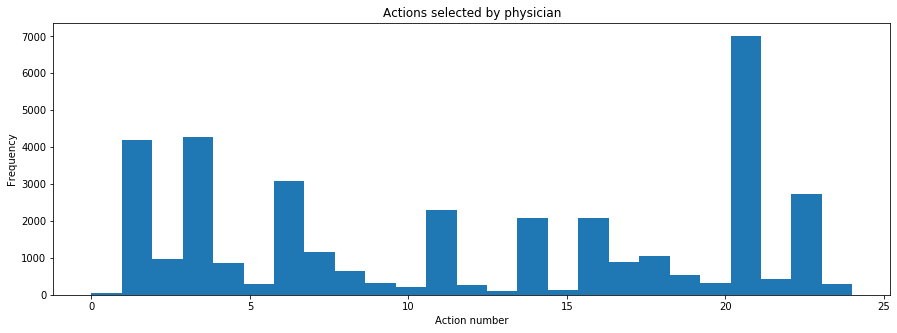

In [184]:
plt.figure(figsize=(15,5))
_ = plt.hist(deeprl2_actions, bins=25)
plt.title("Actions selected by physician")
plt.xlabel("Action number")
plt.ylabel("Frequency")

In [185]:
inv_action_map = {}
count = 0
for i in range(5):
    for j in range(5):
        inv_action_map[count] = [i,j]
        count += 1

In [186]:
#phys_actions_tuple = [None for i in range(len(phys_actions))]
deeprl2_actions_tuple = [None for i in range(len(deeprl2_actions))]
#autoencode_actions_tuple = [None for i in range(len(phys_actions))]                                          

for i in range(len(deeprl2_actions)):
   # phys_actions_tuple[i] = inv_action_map[phys_actions[i]]
    deeprl2_actions_tuple[i] = inv_action_map[deeprl2_actions[i]]
   # autoencode_actions_tuple[i] = inv_action_map[autoencode_actions[i]]

In [187]:
#phys_actions_tuple = np.array(phys_actions_tuple)
deeprl2_actions_tuple = np.array(deeprl2_actions_tuple)
#autoencode_actions_tuple = np.array(autoencode_actions_tuple)

In [188]:
#phys_actions_iv = phys_actions_tuple[:,0]
#phys_actions_vaso = phys_actions_tuple[:,1]
#hist, x_edges, y_edges = np.histogram2d(phys_actions_iv, phys_actions_vaso, bins=5)

In [189]:
deeprl2_actions_iv = deeprl2_actions_tuple[:,0]
deeprl2_actions_vaso = deeprl2_actions_tuple[:,1]
hist2, _, _ = np.histogram2d(deeprl2_actions_iv, deeprl2_actions_vaso, bins=5)

In [190]:
#autoencode_actions_iv = autoencode_actions_tuple[:,0]
#autoencode_actions_vaso = autoencode_actions_tuple[:,1]
#hist3, _, _ = np.histogram2d(autoencode_actions_iv, autoencode_actions_vaso, bins=5)

In [191]:
x_edges = np.arange(-0.5,5)
y_edges = np.arange(-0.5,5)

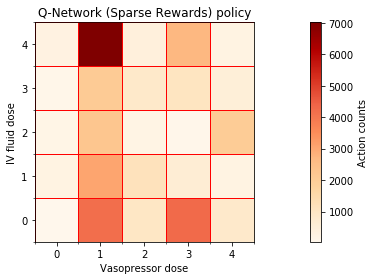

In [192]:
f, (ax2) = plt.subplots(1, 1, figsize=(16,4))
#ax1.imshow(np.flipud(hist2), cmap="Blues",extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
ax2.imshow(np.flipud(hist2), cmap="OrRd", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])
#ax3.imshow(np.flipud(hist2), cmap="Greens", extent=[x_edges[0], x_edges[-1],  y_edges[0],y_edges[-1]])

# ax1.grid(color='b', linestyle='-', linewidth=1)
# ax2.grid(color='r', linestyle='-', linewidth=1)
# ax3.grid(color='g', linestyle='-', linewidth=1)

# Major ticks
#ax1.set_xticks(np.arange(0, 5, 1));
#ax1.set_yticks(np.arange(0, 5, 1));
ax2.set_xticks(np.arange(0, 5, 1));
ax2.set_yticks(np.arange(0, 5, 1));
#ax3.set_xticks(np.arange(0, 5, 1));
#ax3.set_yticks(np.arange(0, 5, 1));

# Labels for major ticks
#ax1.set_xticklabels(np.arange(0, 5, 1));
#ax1.set_yticklabels(np.arange(0, 5, 1));
ax2.set_xticklabels(np.arange(0, 5, 1));
ax2.set_yticklabels(np.arange(0, 5, 1));
#ax3.set_xticklabels(np.arange(0, 5, 1));
#ax3.set_yticklabels(np.arange(0, 5, 1));

# Minor ticks
#ax1.set_xticks(np.arange(-.5, 5, 1), minor=True);
#ax1.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax2.set_yticks(np.arange(-.5, 5, 1), minor=True);
#ax3.set_xticks(np.arange(-.5, 5, 1), minor=True);
#ax3.set_yticks(np.arange(-.5, 5, 1), minor=True);

# Gridlines based on minor ticks
#ax1.grid(which='minor', color='b', linestyle='-', linewidth=1)
ax2.grid(which='minor', color='r', linestyle='-', linewidth=1)
#ax3.grid(which='minor', color='g', linestyle='-', linewidth=1)

#im1 = ax1.pcolormesh(x_edges, y_edges, hist, cmap='Blues')
#f.colorbar(im1, ax=ax1, label = "Action counts")

im2 = ax2.pcolormesh(x_edges, y_edges, hist2, cmap='OrRd')
f.colorbar(im2, ax=ax2, label = "Action counts")

#im3 = ax3.pcolormesh(x_edges, y_edges, hist3, cmap='Greens')
#f.colorbar(im3, ax=ax3, label = "Action counts")

#ax1.set_ylabel('IV fluid dose')
ax2.set_ylabel('IV fluid dose')
#ax3.set_ylabel('IV fluid dose')
#ax1.set_xlabel('Vasopressor dose')
ax2.set_xlabel('Vasopressor dose')
#ax3.set_xlabel('Vasopressor dose')

#ax1.set_title("Physician policy")
ax2.set_title("Q-Network (Sparse Rewards) policy")
#ax3.set_title("Q-Network (Shaped Rewards) policy")
plt.tight_layout()

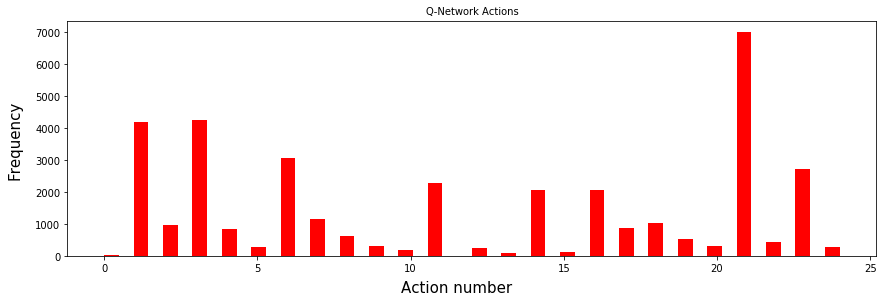

In [193]:
f, (ax2) = plt.subplots(1, 1, sharey=True, figsize=(12,4))
#ax1.hist(deeprl2_actions, bins=50)
#ax1.set_title("Physician Actions", fontsize = 10)
ax2.hist(deeprl2_actions, bins=50, color='r')
ax2.set_title("Q-Network Actions", fontsize = 10)
#ax3.hist(deeprl2_actions, bins=50, color='g')
#ax3.set_title("Autoencode Q-Network Actions", fontsize = 10)
f.text(0.5, -0.03, 'Action number', ha='center', fontsize=15)
f.text(-0.02, 0.5, 'Frequency', va='center', rotation='vertical', fontsize = 15)
# ax2.hist(autoencode_actions, bins=25, color ='g')
plt.tight_layout()


In [342]:
def make_df_diff(op_actions):
    op_vaso_med = []
    op_iv_med = []
    for action in op_actions:
        iv, vaso = inv_action_map[action]
        op_vaso_med.append(vaso_vals[vaso])
        op_iv_med.append(iv_vals[iv])
    iv_diff = np.array(op_iv_med) - np.array(df_test_orig['input_4hourly_tev'])
    vaso_diff = np.array(op_vaso_med) - np.array(df_test_orig['max_dose_vaso'])
    df_diff = pd.DataFrame()
    df_diff['icustayid'] = np.array(df_test_orig['icustayid'])
    df_diff['mort'] = np.array(df_test_orig['died_in_hosp'])
    df_diff['iv_diff'] = iv_diff
    df_diff['vaso_diff'] = vaso_diff
    
    df_diff['iv_op'] = np.array(op_iv_med)
    df_diff['iv_physician'] = np.array(df_test_orig['input_4hourly_tev'])
    df_diff['vaso_op'] = np.array(op_vaso_med)
    df_diff['vaso_physician'] = np.array(df_test_orig['max_dose_vaso'])
    return df_diff
df_diff = make_df_diff(deeprl2_actions)
df_diff.head()

,icustayid,mort,iv_diff,vaso_diff,iv_op,iv_physician,vaso_op,vaso_physician
0,14,0,-323.993308,0.31,976.006692,1300.0,0.31,0.0
1,14,0,656.006692,0.31,976.006692,320.0,0.31,0.0
2,14,0,656.006692,0.31,976.006692,320.0,0.31,0.0
3,14,0,816.006692,0.31,976.006692,160.0,0.31,0.0
4,14,0,320.000000,0.31,320.000000,0.0,0.31,0.0


In [355]:
import math
i = -800
count = df_diff.loc[(df_diff['iv_diff'] > i-50) & (df_diff['iv_diff']<i+50)]
count['mort'].std()/math.sqrt(len(count['mort']))

0.0202437065173546

In [344]:
from scipy.stats import sem
def make_iv_plot_data(df_diff):
    bin_medians_iv = []
    mort_iv = []
    mort_std_iv= []
    i = -800
    while i <= 900:
        count = df_diff.loc[(df_diff['iv_diff'] > i-50) & (df_diff['iv_diff']<i+50)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_iv.append(i)
                mort_iv.append(res)
                mort_std_iv.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 100
    return bin_medians_iv, mort_iv, mort_std_iv

def make_vaso_plot_data(df_diff):
    bin_medians_vaso = []
    mort_vaso= []
    mort_std_vaso= []
    i = -0.6
    while i <= 0.8:
        count = df_diff.loc[(df_diff['vaso_diff']>i-0.05) & (df_diff['vaso_diff']<i+0.05)]
        try:
            res = sum(count['mort'])/float(len(count))
            if len(count) >=2:
                bin_medians_vaso.append(i)
                mort_vaso.append(res)
                mort_std_vaso.append(sem(count['mort']))
        except ZeroDivisionError:
            pass
        i += 0.1
    return bin_medians_vaso, mort_vaso, mort_std_vaso

bin_medians_iv, mort_iv, mort_std_iv = make_iv_plot_data(df_diff)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff)

In [212]:
df_diff['vaso_diff'].max()

0.8857499999999998

In [202]:
vaso_vals

[0, 0.04, 0.135, 0.31, 0.8857499999999998]

In [196]:
#df_diff_autoencode = make_df_diff(autoencode_actions)
df_diff_deeprl2 = make_df_diff(deeprl2_actions)

In [197]:
#bin_med_iv_auto, mort_iv_auto, mort_std_iv_auto = make_iv_plot_data(df_diff_autoencode)
bin_med_iv_deep, mort_iv_deep, mort_std_iv_deep = make_iv_plot_data(df_diff_deeprl2)
#bin_med_vaso_auto, mort_vaso_auto, mort_std_vaso_auto = make_vaso_plot_data(df_diff_autoencode)
bin_med_vaso_deep, mort_vaso_deep, mort_std_vaso_deep = make_vaso_plot_data(df_diff_deeprl2)

In [ ]:
def plot_iv_diff_mort(bin_medians_iv, mort_iv_deep, mort_std_iv_deep):
    ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
    ax2.fill_between(bin_med_iv_deep, 
                     sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep, 
                     sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, 
                     color='tomato')
    ax2.set_title('Q-Network (Sparse Rewards) - IV fluids')
    x_iv = [i for i in range(-800,900,400)]

    print(x_iv, " x_iv")
    ax2.set_xticks(x_iv)
    ax2.grid()
    

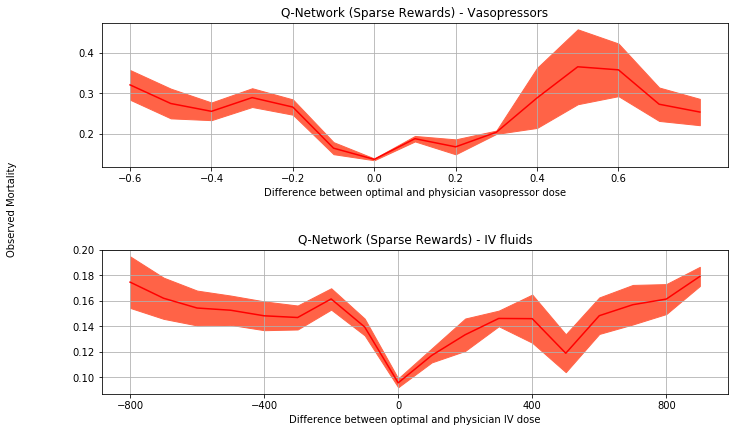

In [339]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize = (10.5,7))
ax1.plot(bin_med_vaso_deep, sliding_mean(mort_vaso_deep), color='r')
ax1.fill_between(bin_med_vaso_deep, 
                 sliding_mean(mort_vaso_deep) - 1*mort_std_vaso_deep,  
                 sliding_mean(mort_vaso_deep) + 1*mort_std_vaso_deep, 
                 color='tomato')
ax1.set_title('Q-Network (Sparse Rewards) - Vasopressors')
x_r = [i/10.0 for i in range(-6,8,2)]
y_r = [i/20.0 for i in range(0,20,2)]
ax1.set_xticks(x_r)
# ax1.set_yticks(y_r)
ax1.grid()

ax2.plot(bin_med_iv_deep, sliding_mean(mort_iv_deep), color='r')
ax2.fill_between(bin_med_iv_deep, 
                 sliding_mean(mort_iv_deep) - 1*mort_std_iv_deep, 
                 sliding_mean(mort_iv_deep) + 1*mort_std_iv_deep, 
                 color='tomato')
ax2.set_title('Q-Network (Sparse Rewards) - IV fluids')
x_iv = [i for i in range(-800,900,400)]

ax2.set_xticks(x_iv)
ax2.grid()


plt.tight_layout(pad=5.0)

ax1.set_xlabel('Difference between optimal and physician vasopressor dose',fontsize=10)
ax2.set_xlabel('Difference between optimal and physician IV dose', fontsize=10)
fig.text(-0.02, 0.5, 'Observed Mortality', va='center', rotation='vertical', fontsize = 10)

plt.savefig("../plots/dq_norm_diff_mort.png")

In [ ]:
#ax3.plot(bin_med_vaso_auto, sliding_mean(mort_vaso_auto), color='g')
#ax3.fill_between(bin_med_vaso_auto, sliding_mean(mort_vaso_auto) - 1*mort_std_vaso_auto,  
                # sliding_mean(mort_vaso_auto) + 1*mort_std_vaso_auto, color='palegreen')
#y_auto = [i/20.0 for i in range(0,21,1)]
#ax3.set_yticks(y_auto)
#ax3.set_title('Q-Network (Shaped Rewards) - Vasopressors')
#ax3.grid()

#ax4.plot(bin_med_iv_auto, sliding_mean(mort_iv_auto), color='g')
#ax4.fill_between(bin_med_iv_auto, sliding_mean(mort_iv_auto) - 1*mort_std_iv_auto,  
 #                sliding_mean(mort_iv_auto) + 1*mort_std_iv_auto, color='palegreen')
#ax4.set_title('Q-Network (Shaped Rewards) - IV Fluids')
#ax4.grid()